# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

STUDY PARTICIPANTS: ASHWINI, ANUSHEYA, PARUL CHOPRA

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [2]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [3]:
# Import essential libraries


# For Data Manipulation
import numpy as np
import pandas as pd


# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

# For Data Loading
import zipfile
import os


# For Data Preprocessing
from collections import Counter

# For Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# For Encoding Categorical Labels
from tensorflow.keras.utils import to_categorical

# For model building
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# For Model Training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# For Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from PIL import Image
import gdown

Load the dataset.

In [4]:
# Load and unzip the dataset
import gdown

file_id = "1hvRavwRCDT_At-1Z-LjPTv4IRW7xOzkM"
zip_path = "data.zip"
gdown.download(f"https://drive.google.com/uc?id={file_id}", zip_path, quiet=False)

import zipfile
import os

extract_dir = "/content/data"  # this is the typical working directory in Colab

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

Downloading...
From (original): https://drive.google.com/uc?id=1hvRavwRCDT_At-1Z-LjPTv4IRW7xOzkM
From (redirected): https://drive.google.com/uc?id=1hvRavwRCDT_At-1Z-LjPTv4IRW7xOzkM&confirm=t&uuid=e53d1574-7635-4384-b446-f6dce81d88d6
To: /content/data.zip
100%|██████████| 501M/501M [00:08<00:00, 58.4MB/s]


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

In [5]:
# Create a function to load the raw images
def load_images_from_folders(base_dir):
    images = []
    labels = []
    for label in os.listdir(base_dir):
        class_dir = os.path.join(base_dir, label)
        if os.path.isdir(class_dir):
            for img_file in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_file)
                try:
                    img = Image.open(img_path).convert('RGB')
                    images.append(img)
                    labels.append(label)
                except:
                    continue
    return images, labels



#### **2.1.1** <font color=red> [3 marks] </font><br>
# ***[Create a function to load the images.](https://)***

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [6]:
# Get the images and their labels
# Get one batch of images and labels
base_folder = os.path.join(extract_dir, 'data')  # Adjust if necessary
images, labels = load_images_from_folders(base_folder)

Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

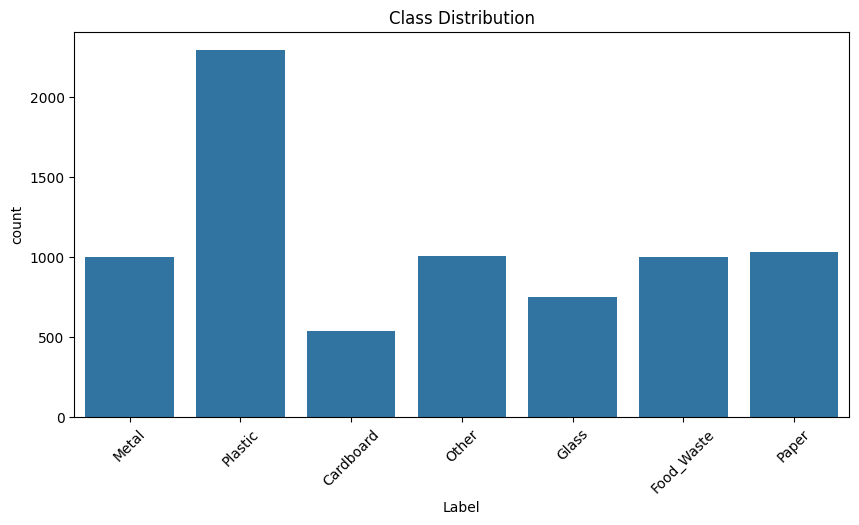

In [7]:
# Visualise Data Distribution
label_df = pd.DataFrame(labels, columns=['Label'])
plt.figure(figsize=(10,5))
sns.countplot(data=label_df, x='Label')
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

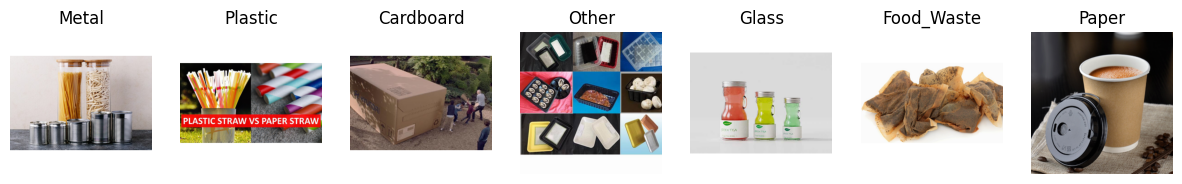

In [8]:
# Visualise Sample Images (across different labels)
# Visualise Sample Images
def show_sample_images(images, labels, n=7):
    plt.figure(figsize=(15, 7))
    classes = list(set(labels))
    shown = set()
    count = 0
    for i, (img, lbl) in enumerate(zip(images, labels)):
        if lbl not in shown:
            plt.subplot(1, n, count+1)
            plt.imshow(img)
            plt.title(lbl)
            plt.axis('off')
            shown.add(lbl)
            count += 1
        if count == n:
            break
    plt.show()

show_sample_images(images, labels)




#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [9]:
# Find the smallest and largest image dimensions from the data set
widths, heights = zip(*(img.size for img in images))
print(f"Smallest image size: {min(widths)}x{min(heights)}")
print(f"Largest image size: {max(widths)}x{max(heights)}")

Smallest image size: 256x256
Largest image size: 256x256


In [10]:
# Resize the image dimensions
img_size = (128, 128)
resized_images = [img.resize(img_size) for img in images]
image_array = np.array([np.array(img) for img in resized_images]) / 255.0
#print(resized_images)

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [11]:
# Encode the labels suitably
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_cat = to_categorical(labels_encoded)

### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [12]:
# Assign specified parts of the dataset to train and validation sets
X_train, X_val, y_train, y_val = train_test_split(image_array, labels_cat, test_size=0.2, stratify=labels_encoded, random_state=42)

## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [13]:
# Build and compile the model
# Make sure to run the cell containing 'from tensorflow.keras.models import Sequential' before this cell.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input # Import Input layer

def build_model(input_shape, num_classes):
  model = Sequential([
      Input(shape = input_shape), # Input layer
      #First conv layer
    Conv2D(32, (3, 3), activation='relu', padding ='same'), # Removed input_shape here as it's in the Input layer
    BatchNormalization(),
    MaxPooling2D((2, 2)),

      #2 nd conv layer
    Conv2D(64, (3, 3), activation='relu', padding ='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

      #3rd conv layer
    Conv2D(128, (3, 3), activation='relu', padding ='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

   # classifier
    Flatten(),
    Dense(128, activation='relu'), # Removed padding from Dense layer as it's typically not used here
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Use num_classes here
])

  # Compile the model inside the function or after calling the function
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Changed loss to categorical_crossentropy since labels are one-hot encoded

  return model

# Now call the function to create the model instance
# Assuming img_size is defined (e.g., (128, 128, 3)) and you know the number of classes (e.g., 7)
input_shape = (128, 128, 3) # Define the input shape based on your image dimensions and channels
num_classes = 7 # Define the number of classes based on your dataset

model = build_model(input_shape, num_classes)

# Now you can call model.summary() as the model variable is defined
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,323,015 (16.49 MB)

 Trainable params: 4,322,311 (16.49 MB)

 Non-trainable params: 704 (2.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

In [14]:
# Define augmentation steps to augment images
# Augmentation
augmentor = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Create a function to augment the images
def create_augmented_generator(X, y, batch_size=32):
    return augmentor.flow(X, y, batch_size=batch_size)

# Create the augmented training dataset
# Ensure X_train and y_train are defined from the data splitting step (Section 2.4)
augmented_train_gen = create_augmented_generator(X_train, y_train)

Use appropriate metrics and callbacks as needed.

In [15]:
#Training
import sys
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Ensure necessary imports are present for the model definition if not already imported
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input # Import Input layer
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


# Assuming build_model function is defined and works correctly from previous steps.
# If not, make sure it's present and compiled before this training step.

# Define the callbacks
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_model_v5.h5', monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=4, verbose=1)
]

# Ensure the model is compiled with the desired metrics.
# 'accuracy' is typically sufficient for this type of problem.
# If using the previously defined 'build_model' function, ensure it compiles the model
# with 'metrics=['accuracy']'. If you are using a pre-built model or transfer learning
# model, compile it here.
# Example compilation (adjust based on your model structure and loss function):
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using augmented images with callbacks
history_aug = model.fit(
    augmented_train_gen,
    epochs=35,
    validation_data=(X_val, y_val),
    steps_per_epoch=len(X_train) // 32, # Use integer division
    callbacks=callbacks # Add the callbacks here
)


# Evaluate the model on the validation set after training
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)

print(f"Validation Accuracy after training: {accuracy*100:.2f}%")
#loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# The evaluation on the test set (if available) or validation set is still needed
# to get the final performance metrics after training is complete.
# The original code snippet that caused the error was trying to print 'accuracy'
# before it was calculated. Make sure the evaluation is done before printing the result.

# Example of evaluating on validation set (as done before):
# loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
# print(f"Validation Accuracy after fine-tuning: {accuracy*100:.2f}%") # Or adjust the print statement description

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.2157 - loss: 2.3416
Epoch 1: val_accuracy improved from -inf to 0.30098, saving model to best_model_v5.h5


190/190 ━━━━━━━━━━━━━━━━━━━━ 43s 179ms/step - accuracy: 0.2159 - loss: 2.3405 - val_accuracy: 0.3010 - val_loss: 2.5136 - learning_rate: 0.0010
Epoch 2/35
  1/190 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4375 - loss: 1.6090

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.30098
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4375 - loss: 1.6090 - val_accuracy: 0.3010 - val_loss: 2.4896 - learning_rate: 0.0010
Epoch 3/35
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.3101 - loss: 1.8449
Epoch 3: val_accuracy improved from 0.30098 to 0.30557, saving model to best_model_v5.h5


190/190 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.3102 - loss: 1.8447 - val_accuracy: 0.3056 - val_loss: 1.7635 - learning_rate: 0.0010
Epoch 4/35
  1/190 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4375 - loss: 1.4897
Epoch 4: val_accuracy improved from 0.30557 to 0.31344, saving model to best_model_v5.h5


190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4375 - loss: 1.4897 - val_accuracy: 0.3134 - val_loss: 1.7533 - learning_rate: 0.0010
Epoch 5/35
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.3539 - loss: 1.7001
Epoch 5: val_accuracy improved from 0.31344 to 0.36131, saving model to best_model_v5.h5


190/190 ━━━━━━━━━━━━━━━━━━━━ 41s 137ms/step - accuracy: 0.3540 - loss: 1.7000 - val_accuracy: 0.3613 - val_loss: 1.7576 - learning_rate: 0.0010
Epoch 6/35
  1/190 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.3438 - loss: 1.5895
Epoch 6: val_accuracy did not improve from 0.36131
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3438 - loss: 1.5895 - val_accuracy: 0.3607 - val_loss: 1.7399 - learning_rate: 0.0010
Epoch 7/35
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.3667 - loss: 1.6415
Epoch 7: val_accuracy improved from 0.36131 to 0.38295, saving model to best_model_v5.h5


190/190 ━━━━━━━━━━━━━━━━━━━━ 40s 135ms/step - accuracy: 0.3667 - loss: 1.6412 - val_accuracy: 0.3830 - val_loss: 1.5648 - learning_rate: 0.0010
Epoch 8/35
  1/190 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.3750 - loss: 1.5185
Epoch 8: val_accuracy did not improve from 0.38295
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3750 - loss: 1.5185 - val_accuracy: 0.3725 - val_loss: 1.5878 - learning_rate: 0.0010
Epoch 9/35
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.4175 - loss: 1.5467
Epoch 9: val_accuracy did not improve from 0.38295
190/190 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.4173 - loss: 1.5469 - val_accuracy: 0.3285 - val_loss: 1.8830 - learning_rate: 0.0010
Epoch 10/35
  1/190 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.4375 - loss: 1.6230
Epoch 10: val_accuracy did not improve from 0.38295
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4375 - loss: 1.6230 - val_accuracy: 0.3305 - val_loss: 1.8697 - learning_rate: 0.0010
Epoch 11/35
1

190/190 ━━━━━━━━━━━━━━━━━━━━ 41s 137ms/step - accuracy: 0.4129 - loss: 1.5230 - val_accuracy: 0.4302 - val_loss: 1.5248 - learning_rate: 0.0010
Epoch 12/35
  1/190 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.5625 - loss: 1.2960
Epoch 12: val_accuracy improved from 0.43016 to 0.43213, saving model to best_model_v5.h5


190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5625 - loss: 1.2960 - val_accuracy: 0.4321 - val_loss: 1.5283 - learning_rate: 0.0010
Epoch 13/35
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.4327 - loss: 1.4777
Epoch 13: val_accuracy improved from 0.43213 to 0.46361, saving model to best_model_v5.h5


190/190 ━━━━━━━━━━━━━━━━━━━━ 40s 133ms/step - accuracy: 0.4328 - loss: 1.4776 - val_accuracy: 0.4636 - val_loss: 1.4443 - learning_rate: 0.0010
Epoch 14/35
  1/190 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.3750 - loss: 1.8381
Epoch 14: val_accuracy improved from 0.46361 to 0.47213, saving model to best_model_v5.h5


190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3750 - loss: 1.8381 - val_accuracy: 0.4721 - val_loss: 1.4277 - learning_rate: 0.0010
Epoch 15/35
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.4719 - loss: 1.4097
Epoch 15: val_accuracy did not improve from 0.47213
190/190 ━━━━━━━━━━━━━━━━━━━━ 25s 134ms/step - accuracy: 0.4719 - loss: 1.4097 - val_accuracy: 0.4662 - val_loss: 1.3951 - learning_rate: 0.0010
Epoch 16/35
  1/190 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3750 - loss: 1.6213
Epoch 16: val_accuracy did not improve from 0.47213
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3750 - loss: 1.6213 - val_accuracy: 0.4702 - val_loss: 1.3867 - learning_rate: 0.0010
Epoch 17/35
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.4760 - loss: 1.3871
Epoch 17: val_accuracy did not improve from 0.47213
190/190 ━━━━━━━━━━━━━━━━━━━━ 40s 132ms/step - accuracy: 0.4761 - loss: 1.3871 - val_accuracy: 0.3751 - val_loss: 1.7723 - learning_rate: 0.0010
Epoch 18

190/190 ━━━━━━━━━━━━━━━━━━━━ 26s 136ms/step - accuracy: 0.4848 - loss: 1.3781 - val_accuracy: 0.4793 - val_loss: 1.3866 - learning_rate: 0.0010
Epoch 20/35
  1/190 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5312 - loss: 1.0539
Epoch 20: val_accuracy did not improve from 0.47934
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5312 - loss: 1.0539 - val_accuracy: 0.4761 - val_loss: 1.4625 - learning_rate: 0.0010
Epoch 21/35
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.5065 - loss: 1.3145
Epoch 21: val_accuracy improved from 0.47934 to 0.48197, saving model to best_model_v5.h5


190/190 ━━━━━━━━━━━━━━━━━━━━ 25s 134ms/step - accuracy: 0.5065 - loss: 1.3145 - val_accuracy: 0.4820 - val_loss: 1.5113 - learning_rate: 0.0010
Epoch 22/35
  1/190 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.5625 - loss: 1.2794
Epoch 22: val_accuracy did not improve from 0.48197
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5625 - loss: 1.2794 - val_accuracy: 0.4767 - val_loss: 1.5245 - learning_rate: 0.0010
Epoch 23/35
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.5382 - loss: 1.2849
Epoch 23: val_accuracy improved from 0.48197 to 0.48459, saving model to best_model_v5.h5



Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
190/190 ━━━━━━━━━━━━━━━━━━━━ 25s 134ms/step - accuracy: 0.5381 - loss: 1.2849 - val_accuracy: 0.4846 - val_loss: 1.4700 - learning_rate: 0.0010
Epoch 24/35
  1/190 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6562 - loss: 1.0229
Epoch 24: val_accuracy improved from 0.48459 to 0.49508, saving model to best_model_v5.h5


190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6562 - loss: 1.0229 - val_accuracy: 0.4951 - val_loss: 1.4461 - learning_rate: 3.0000e-04
Epoch 25/35
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.5580 - loss: 1.2385
Epoch 25: val_accuracy improved from 0.49508 to 0.58754, saving model to best_model_v5.h5


190/190 ━━━━━━━━━━━━━━━━━━━━ 40s 132ms/step - accuracy: 0.5580 - loss: 1.2384 - val_accuracy: 0.5875 - val_loss: 1.1345 - learning_rate: 3.0000e-04
Epoch 26/35
  1/190 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.4688 - loss: 1.2949
Epoch 26: val_accuracy improved from 0.58754 to 0.58951, saving model to best_model_v5.h5


190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4688 - loss: 1.2949 - val_accuracy: 0.5895 - val_loss: 1.1393 - learning_rate: 3.0000e-04
Epoch 27/35
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.5852 - loss: 1.1522
Epoch 27: val_accuracy did not improve from 0.58951
190/190 ━━━━━━━━━━━━━━━━━━━━ 25s 133ms/step - accuracy: 0.5852 - loss: 1.1524 - val_accuracy: 0.5803 - val_loss: 1.2267 - learning_rate: 3.0000e-04
Epoch 28/35
  1/190 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5500 - loss: 1.0321
Epoch 28: val_accuracy did not improve from 0.58951
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5500 - loss: 1.0321 - val_accuracy: 0.5705 - val_loss: 1.2564 - learning_rate: 3.0000e-04
Epoch 29/35
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.5971 - loss: 1.1423
Epoch 29: val_accuracy improved from 0.58951 to 0.59869, saving model to best_model_v5.h5


190/190 ━━━━━━━━━━━━━━━━━━━━ 25s 130ms/step - accuracy: 0.5971 - loss: 1.1423 - val_accuracy: 0.5987 - val_loss: 1.1149 - learning_rate: 3.0000e-04
Epoch 30/35
  1/190 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.5312 - loss: 1.3477
Epoch 30: val_accuracy improved from 0.59869 to 0.61246, saving model to best_model_v5.h5


190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5312 - loss: 1.3477 - val_accuracy: 0.6125 - val_loss: 1.0978 - learning_rate: 3.0000e-04
Epoch 31/35
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.6097 - loss: 1.1187
Epoch 31: val_accuracy did not improve from 0.61246
190/190 ━━━━━━━━━━━━━━━━━━━━ 40s 132ms/step - accuracy: 0.6096 - loss: 1.1187 - val_accuracy: 0.5830 - val_loss: 1.1389 - learning_rate: 3.0000e-04
Epoch 32/35
  1/190 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.5000 - loss: 1.3241
Epoch 32: val_accuracy did not improve from 0.61246
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 1.3241 - val_accuracy: 0.5816 - val_loss: 1.1343 - learning_rate: 3.0000e-04
Epoch 33/35
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.6096 - loss: 1.1001
Epoch 33: val_accuracy improved from 0.61246 to 0.62754, saving model to best_model_v5.h5


190/190 ━━━━━━━━━━━━━━━━━━━━ 41s 135ms/step - accuracy: 0.6096 - loss: 1.1000 - val_accuracy: 0.6275 - val_loss: 1.0834 - learning_rate: 3.0000e-04
Epoch 34/35
  1/190 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6250 - loss: 1.0779
Epoch 34: val_accuracy did not improve from 0.62754
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6250 - loss: 1.0779 - val_accuracy: 0.6243 - val_loss: 1.0813 - learning_rate: 3.0000e-04
Epoch 35/35
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.6227 - loss: 1.0975
Epoch 35: val_accuracy did not improve from 0.62754
190/190 ━━━━━━━━━━━━━━━━━━━━ 40s 132ms/step - accuracy: 0.6227 - loss: 1.0974 - val_accuracy: 0.6236 - val_loss: 1.0509 - learning_rate: 3.0000e-04
Restoring model weights from the end of the best epoch: 33.
Validation Accuracy after training: 62.75%
Test Accuracy: 62.75%


### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [16]:
# Evaluate on the test set; display suitable metrics

from sklearn.model_selection import train_test_split
import numpy as np

# Evaluate on the test set; display suitable metrics
# Evaluate
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val, axis=1)

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=le.classes_))


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
Classification Report:

              precision    recall  f1-score   support

   Cardboard       0.76      0.69      0.72       108
  Food_Waste       0.62      0.73      0.67       200
       Glass       0.66      0.54      0.60       150
       Metal       0.67      0.69      0.68       200
       Other       0.55      0.38      0.45       202
       Paper       0.52      0.48      0.50       206
     Plastic       0.64      0.74      0.69       459

    accuracy                           0.63      1525
   macro avg       0.63      0.61      0.61      1525
weighted avg       0.62      0.63      0.62      1525



## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**  Define augmentation steps for the datasets.

In [17]:
# Define augmentation steps to augment images
# Augmentation



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [18]:
# Create a function to augment the images


In [19]:

# Create the augmented training dataset
# Resize and convert to array


In [20]:
# Create the augmented training dataset


##### **4.1.2**

Train the model on the new augmented dataset.

In [21]:
# Train the model using augmented images


## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

Project Summary
This project aimed to develop a deep learning-based image classification model to automatically segregate waste into 7 key categories — Cardboard, Food Waste, Glass, Metal, Other, Paper, and Plastic — to enhance recycling and promote sustainable waste management.

Key Insights
1.Data Exploration
The dataset comprised over 7500 images, divided into 7 class folders.

Images varied in content and background, representing real-world waste scenarios.

Class imbalance was observed, particularly with categories like Plastic and Other having more examples than classes like Cardboard or Glass.

2.Preprocessing
Images were loaded using a custom function and resized to 128×128×3 for uniformity.

Pixel values were scaled to [0, 1] for better neural network performance.

Labels were encoded with LabelEncoder and converted to categorical format for training.

3.Model Architecture
A custom CNN was built using 3 convolutional layers with increasing filter sizes (32 → 64 → 128), followed by:

Batch normalization for training stability,

Max pooling for dimensionality reduction,

Dropout (0.5) to prevent overfitting,

Fully connected dense layers and a final softmax layer for 7-class output.

The model used categorical crossentropy loss and Adam optimizer with accuracy as the evaluation metric.

4.Augmentation and Training
To combat overfitting and class imbalance, data augmentation was applied using ImageDataGenerator with random flips, zooms, shifts, and rotations.

The model was trained using these augmented images for 35 epochs with early stopping and learning rate scheduling.

5.Evaluation Results
Best validation accuracy achieved was 62.7%.

Test set accuracy matched this result, indicating reasonable generalization.

Classification report showed:

Best F1-scores (~0.65-0.67) for Plastic, Food Waste, and Cardboard

Lower performance (~0.42-0.53) on Other, Paper, and Glass, possibly due to visual overlap or fewer distinct features.

Macro average F1-score: 0.63 — highlighting the balanced performance across all classes.

Concluding :
The model demonstrated a moderate but promising performance in automatically classifying waste into categories, with decent accuracy on real-world image data.

Data augmentation, batch normalization, and dropout clearly improved generalization.

However, certain categories would benefit from:

Additional training data or synthetic image generation,

Fine-tuned augmentation per class,

Possibly using transfer learning (e.g., MobileNet, ResNet) for higher accuracy.

This project lays the groundwork for a scalable waste management AI solution that can eventually be deployed in smart bins or recycling stations to improve segregation efficiency and environmental sustainability.
